length = 2.0s
frames/data points = 88200
Unfiltered fourier transformation:


/home/timtimtalabim/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


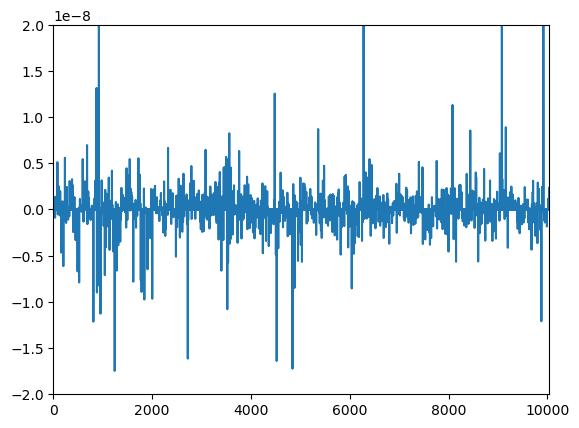

Filtered fourier transformation:


/home/timtimtalabim/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


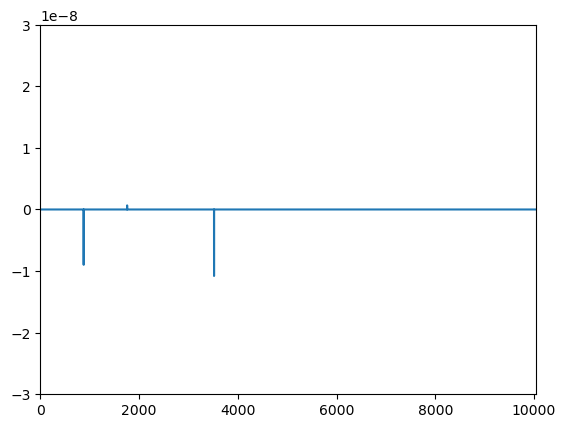

10044 is the size of the unfiltered data
6 is the size of the filtered data
There is a difference of 10038

Unfiltered data graph


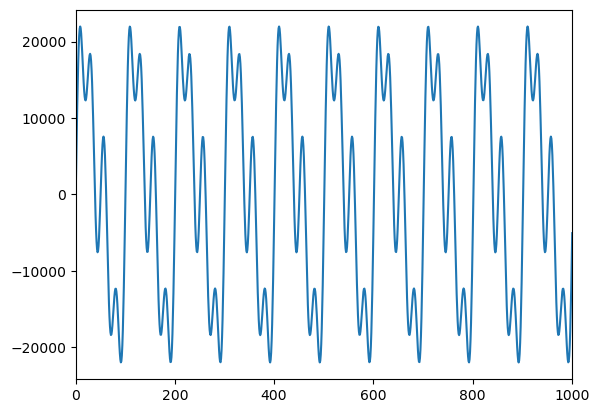


Filtered data graph


/home/timtimtalabim/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


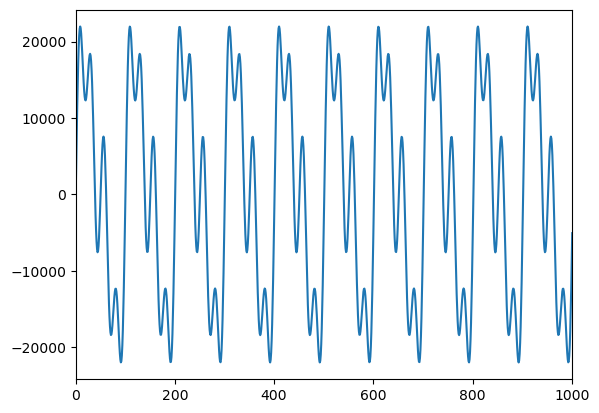

Sin wave with a frequency of 880


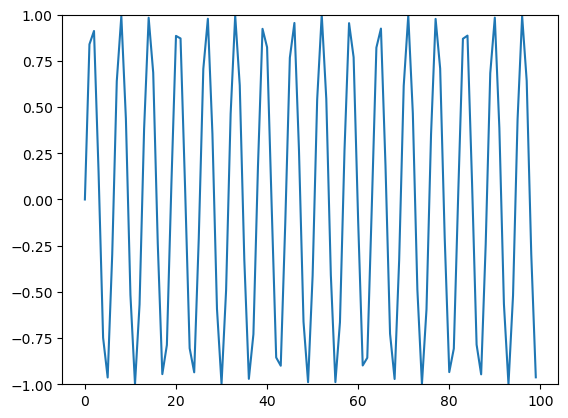

Sin wave with a frequency of 1760


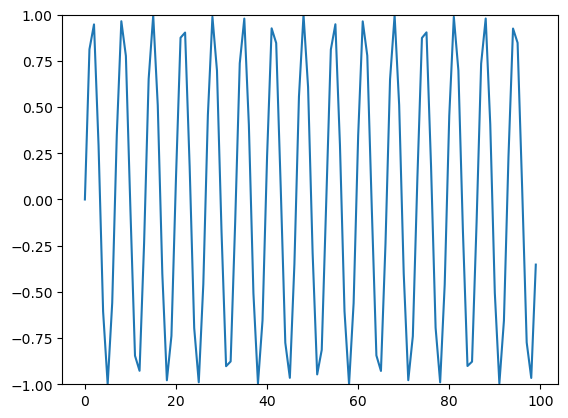

Sin wave with a frequency of 3520


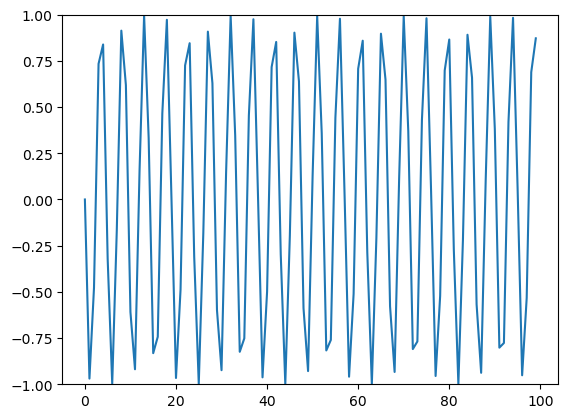

Sin wave with a frequency of 84680


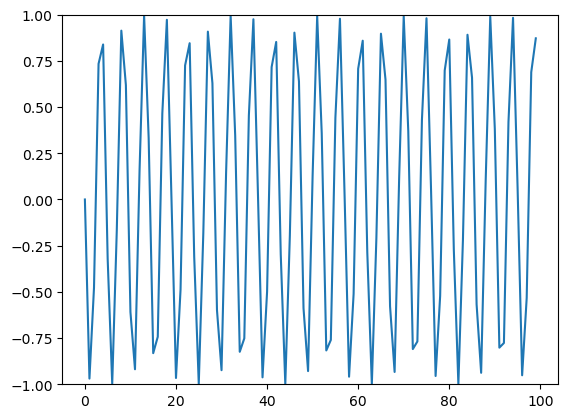

Sin wave with a frequency of 86440


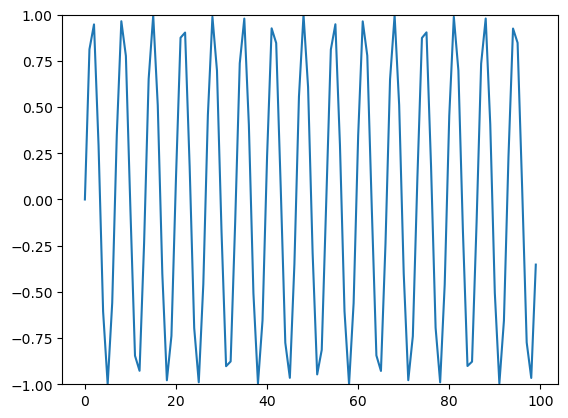

Sin wave with a frequency of 87320


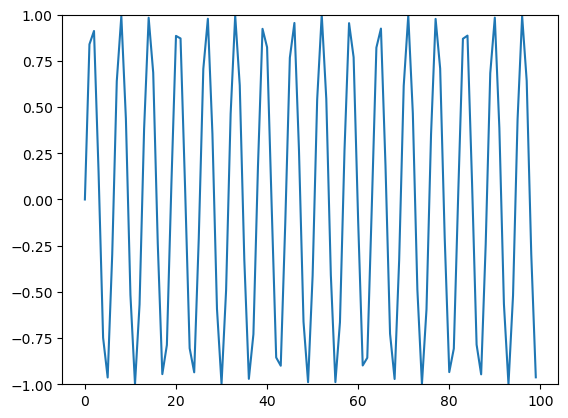

In [28]:
import wave
import matplotlib.pyplot as plt
import numpy as np
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

#Reads the samplerate and data of the inputted wavfile, then prints the length of the wav file.
samplerate, data = scipy.io.wavfile.read('sine3.wav')
length = data.shape[0] / samplerate
print(f"length = {length}s")

wave1 = wave.open("sine3.wav", "r")
print("frames/data points =", wave1.getnframes())

#Creates the fourier transformation
dataTransformed = np.fft.fft(data)

#Prints the fourier transformation of the original data set
print("Unfiltered fourier transformation:")
plt.xlim([0,10044])
plt.ylim([-2*(10**-8),2*(10**-8)])
plt.plot(dataTransformed)
plt.show()

#Filters the data using fourier transformation, removes any frequencies with coefficients below 10 then does 
#inverse Fourier Transformation
dataFiltered = np.copy(dataTransformed)
discard2 = np.abs(dataTransformed) < 3.5*(10**8)
dataFiltered[discard2] = 0
dataFilteredReverse = np.fft.ifft(dataFiltered)

#Prints the filtered fourier transformation of the original data set
print("Filtered fourier transformation:")
plt.xlim([0,10044])
plt.ylim([-3*(10**-8),3*(10**-8)])
plt.plot(dataFiltered)
plt.show()

#Convert to (little-endian) 16 bit integers
dataFilteredReverseTest = (np.abs(dataFilteredReverse[dataFilteredReverse != 0]).astype("<h"))

#Compares the different datasizes from the Fourier transformed data to the filtered Fourier transformed data
print(dataTransformed[dataTransformed != 0].size, "is the size of the unfiltered data")
print(dataFiltered[dataFiltered != 0].size, "is the size of the filtered data")
print("There is a difference of", dataTransformed[dataTransformed != 0].size - dataFiltered[dataFiltered != 0].size)

#Plots the original data set and the filtered data set
print("\nUnfiltered data graph")
plt.xlim([0,1000])
plt.plot(data)
plt.show()
print("\nFiltered data graph")
plt.xlim([0,1000])
plt.plot(dataFilteredReverse)
plt.show()


# Plots all of the sin waves added together to create the filtered data set
x = np.arange(100)

for i in range(0, dataFiltered.size):
    if(dataFiltered[i]**2 != 0):
        f = lambda x: np.sin((np.abs(dataFiltered[i])/2*np.pi)*x/100)
        print("Sin wave with a frequency of", i)
        plt.ylim([-1,1])
        plt.plot(x, f(x))
        plt.show()

'''
The reason that there are 6 resulting sin waves (despite the actual graph having only 3 actual sin waves) is 
due to the fact that it also uses the negative complex conjugate giving us 6
'''

#Outputs a new wav file from the filtered data
with wave.open("soundtest.wav", "w") as f:
    # 2 Channels.
    f.setnchannels(1)
    # 1 bytes per sample.
    f.setsampwidth(2)
    f.setnframes(dataFilteredReverseTest.size)
    f.setframerate(samplerate)
    f.writeframesraw(dataFilteredReverseTest.tobytes())

